In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import warnings
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, accuracy_score, make_scorer, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate




In [4]:
df = pd.read_parquet('data/bert_embeddings_balanced.parquet')

In [5]:
df.shape

(50440, 769)

In [6]:
df.reset_index(inplace=True, drop=True)

In [7]:
df.head(100)

,bert1,bert2,bert3,bert4,bert5,bert6,bert7,bert8,bert9,bert10,...,bert760,bert761,bert762,bert763,bert764,bert765,bert766,bert767,bert768,label
0,-0.736354,-0.452857,-0.900266,0.607368,0.529110,-0.267249,0.433341,0.334155,-0.490231,-0.999952,...,0.077231,0.879335,0.622733,-0.110044,0.129889,0.536032,-0.797028,-0.599843,0.759636,0
1,-0.744532,-0.458835,-0.744694,0.532082,0.311149,-0.129973,0.472880,0.302928,-0.515092,-0.999948,...,0.256472,0.768397,0.710780,0.346100,0.227118,0.615897,-0.566250,-0.635862,0.742113,0
2,-0.703188,-0.482237,-0.837993,0.409060,0.359978,-0.125014,0.141701,0.312893,-0.582415,-0.999898,...,0.357343,0.813748,0.582983,0.249468,-0.001338,0.718755,-0.735795,-0.579613,0.611509,0
3,-0.796584,-0.525187,-0.901323,0.721053,0.615162,-0.146203,0.736815,0.410643,-0.672798,-0.999979,...,-0.195539,0.913168,0.737932,-0.083464,0.204053,0.676939,-0.717710,-0.695663,0.880075,0
4,-0.709045,-0.550619,-0.848802,0.587083,0.369470,-0.166272,0.443767,0.466523,-0.492669,-0.999962,...,-0.386924,0.813545,0.633295,0.182253,0.055231,0.687205,-0.530302,-0.657097,0.604088,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.705946,-0.253652,-0.550520,0.397287,0.385830,-0.040266,0.606308,0.148487,-0.100889,-0.999947,...,0.243007,0.493943,0.672922,-0.007440,0.395682,0.537236,-0.546122,-0.595167,0.778250,0
96,-0.768519,-0.416119,-0.245764,0.493639,0.051298,-0.020308,0.449362,0.363258,0.270590,-0.999965,...,0.281438,0.372006,0.775537,0.503315,0.523688,0.611774,0.095962,-0.619192,0.772750,0
97,-0.643326,-0.609899,-0.893907,0.244104,0.435679,-0.264646,-0.197350,0.608011,-0.730914,-0.999952,...,-0.759492,0.894011,0.405996,0.110120,0.038464,0.657628,-0.482355,-0.585204,0.103463,0
98,-0.671430,-0.537355,-0.912563,0.483875,0.588543,-0.251243,0.073338,0.422361,-0.845951,-0.999905,...,-0.307684,0.915644,0.411544,-0.032862,-0.099991,0.819345,-0.895960,-0.629590,0.593486,0


In [8]:
df[:] = df.sample(frac=1).values

In [9]:
df.head()

,bert1,bert2,bert3,bert4,bert5,bert6,bert7,bert8,bert9,bert10,...,bert760,bert761,bert762,bert763,bert764,bert765,bert766,bert767,bert768,label
0,-0.804159,-0.433965,-0.780689,0.470249,0.364499,-0.131327,0.431971,0.306691,-0.514916,-0.999973,...,-0.157093,0.826958,0.703161,0.389100,0.202482,0.712834,-0.620711,-0.646491,0.758956,0
1,-0.528525,-0.342515,-0.519588,0.110988,0.396821,-0.118739,-0.274145,0.113562,-0.099898,-0.999276,...,0.163342,0.410566,0.333634,0.020613,0.373353,0.553383,-0.780060,-0.538884,0.473679,0
2,-0.723955,-0.348686,-0.745515,0.500983,0.528295,-0.099121,0.211165,0.113080,-0.383583,-0.999924,...,-0.107726,0.760852,0.571061,-0.349397,0.318293,0.704184,-0.832451,-0.553466,0.603161,0
3,-0.860786,-0.457974,-0.928440,0.696425,0.806833,-0.322100,0.495353,0.383994,-0.764967,-0.999975,...,-0.139473,0.971790,0.625425,-0.872995,0.060318,0.694856,-0.922518,-0.582130,0.509824,1
4,-0.842147,-0.459700,-0.837465,0.678962,0.423424,-0.065234,0.789411,0.377242,-0.672851,-0.999987,...,-0.358007,0.926850,0.809439,0.022761,0.136692,0.614027,-0.497790,-0.705399,0.751452,0


In [10]:
df_training = df.sample(frac=0.5, random_state=42)

In [11]:
df_training.reset_index(inplace=True, drop=True)

In [12]:
df_training[:] = df_training.sample(frac=1).values

In [13]:
df_training.head()

,bert1,bert2,bert3,bert4,bert5,bert6,bert7,bert8,bert9,bert10,...,bert760,bert761,bert762,bert763,bert764,bert765,bert766,bert767,bert768,label
0,-0.807061,-0.523050,-0.940863,0.663365,0.579662,-0.140422,0.444660,0.510629,-0.812404,-0.999940,...,-0.619065,0.919562,0.657453,-0.357915,-0.161727,0.695360,-0.655945,-0.689653,0.509996,1
1,-0.731892,-0.738342,-0.990905,0.720547,0.879422,-0.397497,0.193906,0.669016,-0.966219,-0.999975,...,-0.845694,0.993273,0.432116,-0.267373,-0.608351,0.862765,-0.931877,-0.744870,0.400096,0
2,-0.696142,-0.669523,-0.947973,0.475426,0.817796,-0.306118,0.057432,0.490034,-0.855506,-0.999849,...,-0.536035,0.982460,0.525844,0.411764,0.109288,0.725139,-0.844054,-0.707743,0.771353,0
3,-0.722343,-0.505212,-0.894243,0.557872,0.519517,-0.132217,0.430201,0.394988,-0.669911,-0.999972,...,-0.200403,0.842064,0.515779,-0.316906,-0.058423,0.821458,-0.852982,-0.625641,0.608316,0
4,-0.720292,-0.501942,-0.885315,0.615846,0.456140,-0.102747,0.449711,0.369470,-0.698172,-0.999973,...,-0.444250,0.874368,0.725129,0.081988,0.120596,0.800922,-0.626347,-0.614513,0.643748,1


In [14]:
df_drift = df.drop(df_training.index)

In [15]:
df_drift.reset_index(inplace=True, drop=True)
df_drift[:] = df_drift.sample(frac=1).values

In [16]:
df_drift.head()

,bert1,bert2,bert3,bert4,bert5,bert6,bert7,bert8,bert9,bert10,...,bert760,bert761,bert762,bert763,bert764,bert765,bert766,bert767,bert768,label
0,-0.695026,-0.506544,-0.910573,0.622223,0.634349,-0.176276,0.485517,0.384873,-0.759608,-0.999947,...,-0.060876,0.941928,0.591379,0.109435,-0.027710,0.695037,-0.785453,-0.610505,0.737893,0
1,-0.806191,-0.448732,-0.928872,0.743719,0.567336,-0.184702,0.602970,0.265806,-0.738411,-0.999964,...,-0.062237,0.983632,0.700709,-0.044698,0.337032,0.683537,-0.740703,-0.654647,0.796088,1
2,-0.602677,-0.299236,-0.557515,0.208899,0.309041,-0.073171,0.111633,0.146926,0.031540,-0.999885,...,0.215293,0.326008,0.554382,0.027083,0.384420,0.483473,-0.661006,-0.553026,0.541201,0
3,-0.762316,-0.418914,-0.950195,0.584471,0.793064,-0.266239,0.346815,0.257312,-0.791248,-0.999934,...,0.274206,0.950539,0.531669,-0.209474,-0.150574,0.657398,-0.925007,-0.645941,0.829189,0
4,-0.472067,-0.656731,-0.990871,0.491051,0.830138,-0.368116,-0.324867,0.659487,-0.914250,-0.999648,...,-0.835794,0.986935,0.104695,-0.696585,-0.402455,0.823219,-0.968474,-0.703844,0.186129,0


In [17]:
def kFold_train_test_model(model, X, y, n_splits=5, random_state=42):
    acc_list=[]
    f1_list = []
    precision_list = []
    recall_list = []
    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        acc_list.append(accuracy_score(y_test,y_predict))
        f1_list.append(f1_score(y_test,y_predict))
        precision_list.append(precision_score(y_test,y_predict))
        recall_list.append(recall_score(y_test,y_predict))
    return acc_list, f1_list, precision_list, recall_list

In [18]:
y = pd.DataFrame(pd.array(df_training['label']).reshape(-1,1))
X = df_training.drop('label', axis= 1)


In [19]:
y = pd.DataFrame(y)

In [20]:
y.index.name = 'index'

In [23]:
X.index.name = 'index'

In [24]:
X.head()

,bert1,bert2,bert3,bert4,bert5,bert6,bert7,bert8,bert9,bert10,...,bert759,bert760,bert761,bert762,bert763,bert764,bert765,bert766,bert767,bert768
index,,,,,,,,,,,,,,,,,,,,,
0,-0.807061,-0.523050,-0.940863,0.663365,0.579662,-0.140422,0.444660,0.510629,-0.812404,-0.999940,...,0.605306,-0.619065,0.919562,0.657453,-0.357915,-0.161727,0.695360,-0.655945,-0.689653,0.509996
1,-0.731892,-0.738342,-0.990905,0.720547,0.879422,-0.397497,0.193906,0.669016,-0.966219,-0.999975,...,0.843591,-0.845694,0.993273,0.432116,-0.267373,-0.608351,0.862765,-0.931877,-0.744870,0.400096
2,-0.696142,-0.669523,-0.947973,0.475426,0.817796,-0.306118,0.057432,0.490034,-0.855506,-0.999849,...,0.612244,-0.536035,0.982460,0.525844,0.411764,0.109288,0.725139,-0.844054,-0.707743,0.771353
3,-0.722343,-0.505212,-0.894243,0.557872,0.519517,-0.132217,0.430201,0.394988,-0.669911,-0.999972,...,0.760341,-0.200403,0.842064,0.515779,-0.316906,-0.058423,0.821458,-0.852982,-0.625641,0.608316
4,-0.720292,-0.501942,-0.885315,0.615846,0.456140,-0.102747,0.449711,0.369470,-0.698172,-0.999973,...,0.749085,-0.444250,0.874368,0.725129,0.081988,0.120596,0.800922,-0.626347,-0.614513,0.643748


In [25]:
X = np.array(X)
y = np.array(y)

In [50]:
svc = SVC()
svc_acc_list, svc_f1_list, svc_prec_list, svc_recall_list   = kFold_train_test_model(svc,X,y.ravel())
svc_results = [pd.DataFrame(svc_acc_list).mean(), pd.DataFrame(svc_f1_list).mean(), pd.DataFrame(svc_prec_list).mean(), pd.DataFrame(svc_recall_list).mean()]

In [27]:
svc_acc_list

[0.9383425852498017,
 0.940325138778747,
 0.9318001586042823,
 0.926050753370341,
 0.9296193497224425]

In [54]:
svc_linear = SVC(kernel='linear')
svc_linear_acc_list, svc_linear_f1_list, svc_linear_prec_list, svc_linear_recall_list = kFold_train_test_model(svc_linear,X,y.ravel())
svc_linear_results = [pd.DataFrame(svc_linear_acc_list).mean(), pd.DataFrame(svc_linear_f1_list).mean(), pd.DataFrame(svc_linear_prec_list).mean(), pd.DataFrame(svc_linear_recall_list).mean()]

In [55]:
svc_linear_acc_list

[0.9801744647105471,
 0.975614591593973,
 0.9734337827121332,
 0.9714512291831879,
 0.9732355273592387]

In [56]:
svc_poly = SVC(kernel='poly')
svc_poly_acc_list, svc_poly_f1_list, svc_poly_prec_list, svc_poly_recall_list = kFold_train_test_model(svc_poly,X,y.ravel())
svc_poly_results = [pd.DataFrame(svc_poly_acc_list).mean(), pd.DataFrame(svc_poly_f1_list).mean(), pd.DataFrame(svc_poly_prec_list).mean(), pd.DataFrame(svc_poly_recall_list).mean()]

In [57]:
svc_poly_acc_list

[0.9569785884218874,
 0.9553925455987312,
 0.9504361617763679,
 0.9478588421887391,
 0.9498413957176843]

In [58]:
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid_acc_list, svc_sigmoid_f1_list, svc_sigmoid_prec_list, svc_sigmoid_recall_list = kFold_train_test_model(svc_sigmoid,X,y.ravel())
svc_sigmoid_results = [pd.DataFrame(svc_sigmoid_acc_list).mean(), pd.DataFrame(svc_sigmoid_f1_list).mean(), pd.DataFrame(svc_sigmoid_prec_list).mean(), pd.DataFrame(svc_sigmoid_recall_list).mean()]

In [140]:
svc_sigmoid_acc_list

[0.5519429024583664,
 0.6651467089611419,
 0.5465900079302141,
 0.5469865186360032,
 0.5475812846946868]

In [132]:
svc_sigmoid_results = np.array(svc_sigmoid_results)
svc_results = np.array(svc_results)
svc_linear_results = np.array(svc_linear_results)
svc_poly_results = np.array(svc_poly_results)

In [133]:
svc_sigmoid_results = np.ndarray.tolist(svc_sigmoid_results)
svc_poly_results = np.ndarray.tolist(svc_poly_results)
svc_linear_results = np.ndarray.tolist(svc_linear_results)
svc_results = np.ndarray.tolist(svc_results)

In [136]:
df_results = pd.DataFrame([svc_results, svc_linear_results, svc_sigmoid_results, svc_poly_results], columns=['Accuracy', 'F1', 'Precision', 'Recall'])

In [138]:
columns=['RBF', 'Linear', 'Sigmoid', 'Poly']
df_results['Model'] = columns

In [139]:
df_results.set_index('Model')

,Accuracy,F1,Precision,Recall
Model,,,,
RBF,[0.9332275971451229],[0.9350996594122817],[0.9093821349112965],[0.9623270908241054]
Linear,[0.9747819191118159],[0.9748902743008332],[0.9703644377954823],[0.9794687919037143]
Sigmoid,[0.5716494845360824],[0.5650328244888229],[0.5730196487061274],[0.557472591764219]
Poly,[0.952101506740682],[0.9524200864206644],[0.9457173551307232],[0.9592191767962002]


In [141]:
with open('SVC_cross_val_table.txt', '+w') as file:
    file.write(df_results.to_latex())

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [145]:
fianl_svc = SVC(kernel='linear')
fianl_svc.fit(X_train,y_train.ravel())

SVC(kernel='linear')

In [146]:
y_pred_test=fianl_svc.predict(X_test)
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9802


In [147]:
model_pkl_file = "SVC_model3.pkl" 
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(fianl_svc, file)

### Concept drift simulation

In [151]:
y_new = pd.DataFrame(pd.array(df_drift['label']).reshape(-1,1))
X_new = df_drift.drop('label', axis= 1)
y_new = pd.DataFrame(y)
y_new.index.name = 'index'
X_new.index.name = 'index'
X_new = np.array(X)
y_new = np.array(y)

In [152]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.2, random_state = 42)

In [153]:
y_pred_new = fianl_svc.predict(X_test_new)

final_model_results = {
    'accuracy' : [accuracy_score(y_test_new, y_pred_new)],
    'precision' : [precision_score(y_test_new, y_pred_new)],
    'recall' : [recall_score(y_test_new, y_pred_new)],
    'f1 score' : [f1_score(y_test_new, y_pred_new)]
}

df_final_model_results = pd.DataFrame(final_model_results)
df_final_model_results

,accuracy,precision,recall,f1 score
0,0.980174,0.973944,0.986405,0.980135


In [160]:
fianl_svc.fit(X_train_new,y_train_new.ravel())

SVC(kernel='linear')

In [162]:
y_pred_new_tuned = fianl_svc.predict(X_test_new)
final_model_result_tuned = {
    'accuracy' : [accuracy_score(y_test_new, y_pred_new_tuned)],
    'precision' : [precision_score(y_test_new, y_pred_new_tuned)],
    'recall' : [recall_score(y_test_new, y_pred_new_tuned)],
    'f1 score' : [f1_score(y_test_new, y_pred_new_tuned)]
}
df_final_model_results_tuned = pd.DataFrame(final_model_result_tuned)
df_final_model_results_tuned

,accuracy,precision,recall,f1 score
0,0.980174,0.973944,0.986405,0.980135


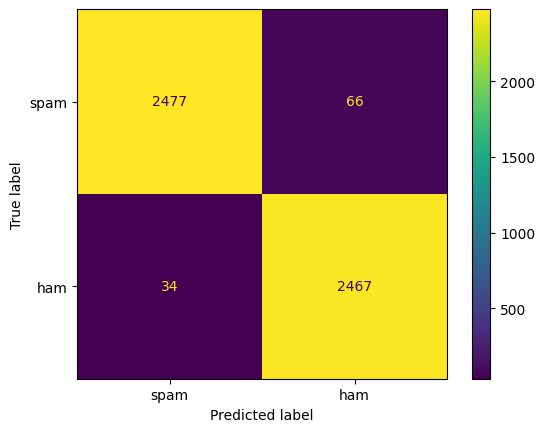

In [164]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test_new, y_pred=y_pred_new_tuned)
disp = ConfusionMatrixDisplay(cm, display_labels=['spam', 'ham'])
disp.plot()
plt.savefig('SVC_confusion_matrix_final.png')
plt.show()